In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/customer_booking.csv', encoding='ISO-8859-1')
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
df['trip_type'].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [ ]:
roundtripcount = df['trip_type'].value_counts()[0]
onewaycount = df['trip_type'].value_counts()[1]
circletripcount = df['trip_type'].value_counts()[2]
totalcount = circletripcount + onewaycount + roundtripcount

In [ ]:
roundtrip_percentage = (roundtripcount/totalcount)*100
print("Round Trip Share: ", roundtrip_percentage)

oneway_percentage = (onewaycount/totalcount)*100
print("One Way Trip Share: ", oneway_percentage)

circletripcount_percentage = (circletripcount/totalcount)*100
print("Circle Trip Share: ", circletripcount_percentage)

Round Trip Share:  98.994
One Way Trip Share:  0.774
Circle Trip Share:  0.232


In [ ]:
df['sales_channel'].value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

In [ ]:
internet_Share = df['sales_channel'].value_counts()[0]
mobile_Share = df['sales_channel'].value_counts()[1]
total_share_sales = internet_Share + mobile_Share

In [ ]:
internet_share_percentage = (internet_Share/total_share_sales)*100
print("Internet Booking Share: ", internet_share_percentage)

mobile_share_percentage = (mobile_Share/total_share_sales)*100
print("Mobile Booking Share: ", mobile_share_percentage)


Internet Booking Share:  88.764
Mobile Booking Share:  11.236


In [ ]:
df['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [ ]:
booked_Share = df['booking_complete'].value_counts()[0]
not_booked_Share = df['booking_complete'].value_counts()[1]
total_share_booking = booked_Share + not_booked_Share

In [ ]:
booked_share_per = (booked_Share/total_share_booking)*100
print("Booked Trips Percentage: ", booked_share_per)

not_booked_share_per = (not_booked_Share/total_share_booking)*100
print("Unbooked Trips Percentage: ", not_booked_share_per)

Booked Trips Percentage:  85.044
Unbooked Trips Percentage:  14.956


In [ ]:
df['booking_origin'].value_counts().count()

104

<ipython-input-12-096684f42ca2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

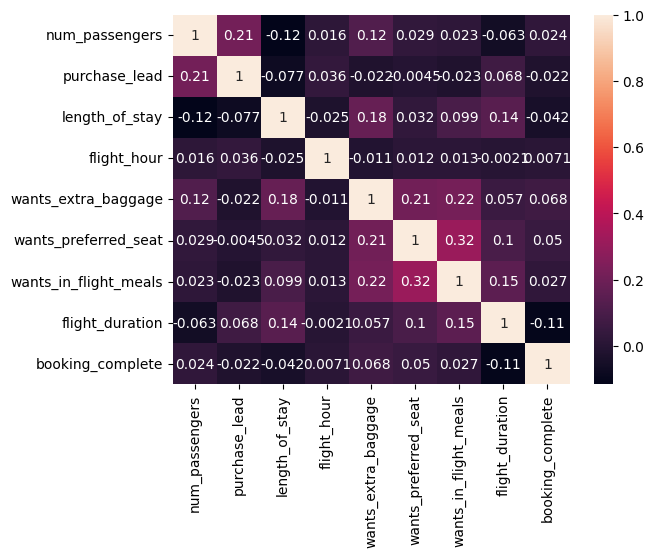

In [ ]:
import seaborn as sns

sns.heatmap(df.corr(),annot=True)

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


<Axes: xlabel='purchase_lead', ylabel='Count'>

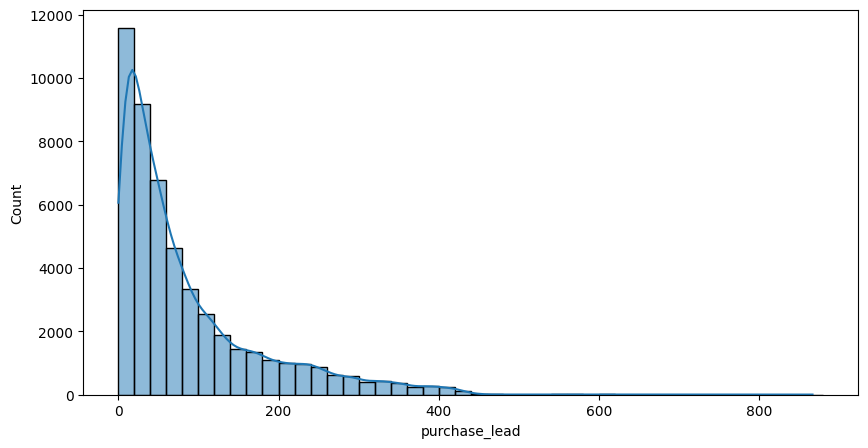

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(data=df, x="purchase_lead", binwidth=20,kde=True)

<Axes: xlabel='length_of_stay', ylabel='Count'>

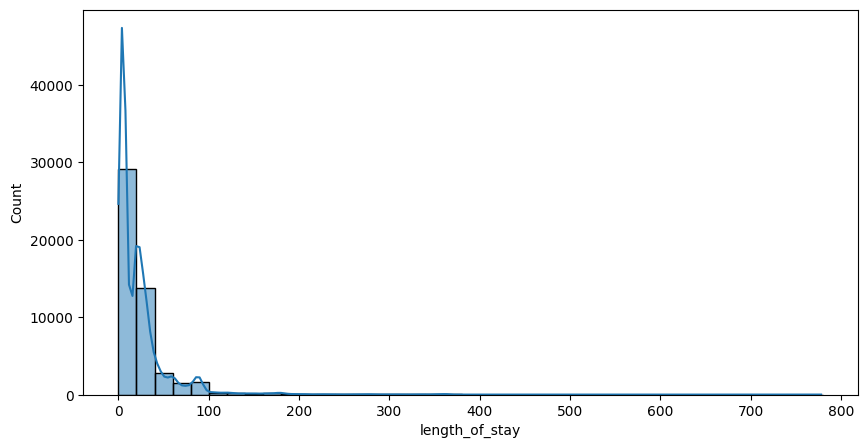

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="length_of_stay", binwidth=20,kde=True)

In [ ]:
day_mapping = {
    'Sun': 7,
    'Mon': 1,
    'Tue': 2,
    'Wed': 3,
    'Thu': 4,
    'Fri': 5,
    'Sat': 6
}

df['flight_day_encoded'] = df['flight_day'].map(day_mapping)

In [ ]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_day_encoded
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,6
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,6
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,3
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,6
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0,6
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0,7
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0,6
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0,1


In [ ]:
df['flight_day_encoded'].value_counts()

1    8102
3    7674
2    7673
4    7424
5    6761
7    6554
6    5812
Name: flight_day_encoded, dtype: int64

Text(0, 0.5, 'Number of bookings')

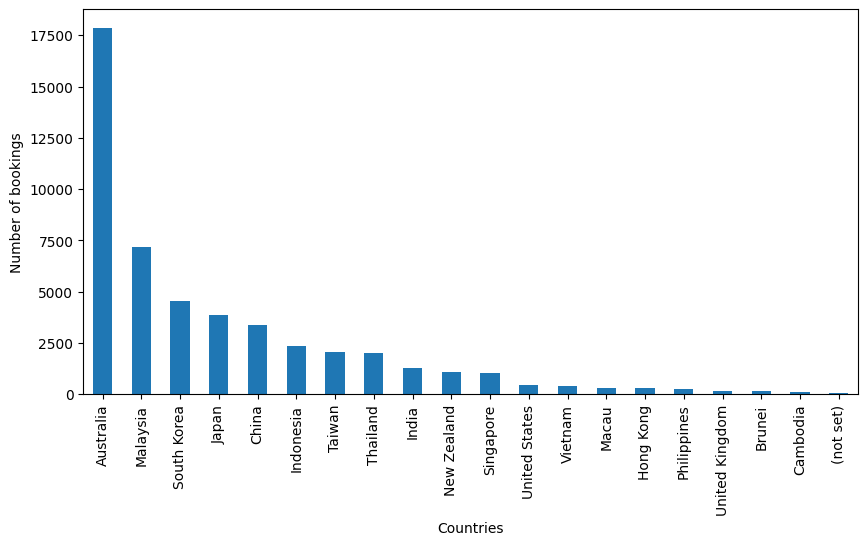

In [ ]:
plt.figure(figsize=(10,5))
ax = df.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")

Text(0, 0.5, 'Number of complete bookings')

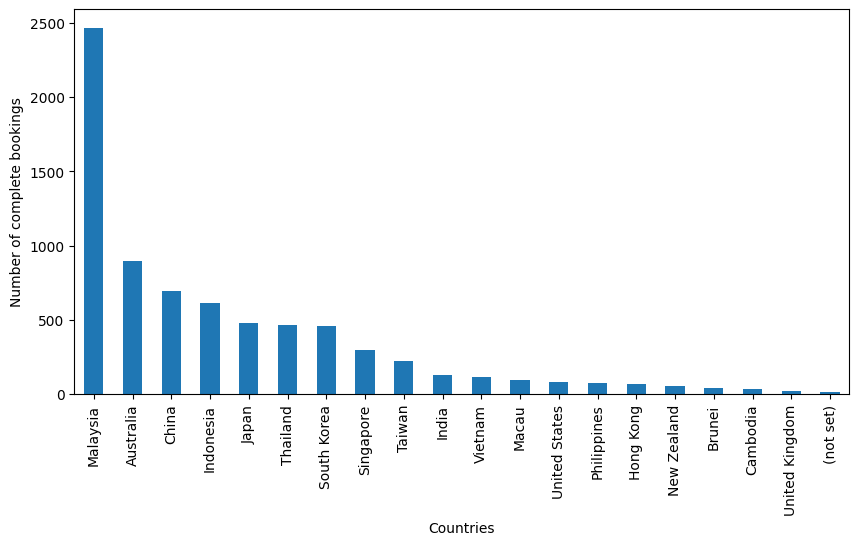

In [ ]:
plt.figure(figsize=(10,5))
ax = df[df.booking_complete ==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")

#Predictive Model

In [ ]:
from sklearn.preprocessing import OneHotEncoder


#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_final = df.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTrip', 1:'OneWayTrip',2:'CircleTrip'})
df_final = df_final.join(encoder_df)

In [ ]:
df_final = df

In [ ]:
df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)

In [ ]:
#store the label for supervised learning
label = df['booking_complete']

In [ ]:
df_final = df_final.drop('booking_complete', axis=1)

In [ ]:
df_final = df_final.drop('flight_day', axis=1)
df_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,flight_day_encoded
0,2,262,19,7,1,0,0,5.52,6
1,1,112,20,3,0,0,0,5.52,6
2,2,243,22,17,1,1,0,5.52,3
3,1,96,31,4,0,0,1,5.52,6
4,2,68,22,15,1,0,1,5.52,3
...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,1,0,1,5.62,6
49996,1,111,6,4,0,0,0,5.62,7
49997,1,24,6,22,0,0,1,5.62,6
49998,1,15,6,11,1,0,1,5.62,1


##Normalization values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_df = scaler.fit_transform(df_final)

In [ ]:
scaled_df = pd.DataFrame(scaled_df, columns = df_final.columns)

In [ ]:
scaled_df['label']  = label
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,flight_day_encoded,label
0,0.400684,1.957530,-0.119353,-0.381764,0.703747,-0.649919,-0.863497,-1.174175,1.096754,0
1,-0.579559,0.299164,-0.089844,-1.120780,-1.420965,-0.649919,-0.863497,-1.174175,1.096754,0
2,0.400684,1.747470,-0.030824,1.465775,0.703747,1.538654,-0.863497,-1.174175,-0.408687,0
3,-0.579559,0.122272,0.234761,-0.936026,-1.420965,-0.649919,1.158082,-1.174175,1.096754,0
4,0.400684,-0.187290,-0.030824,1.096267,0.703747,-0.649919,1.158082,-1.174175,-0.408687,0
...,...,...,...,...,...,...,...,...,...,...
49995,0.400684,-0.640577,-0.502977,-0.012257,0.703747,-0.649919,1.158082,-1.107368,1.096754,0
49996,-0.579559,0.288108,-0.502977,-0.936026,-1.420965,-0.649919,-0.863497,-1.107368,1.598567,0
49997,-0.579559,-0.673744,-0.502977,2.389544,-1.420965,-0.649919,1.158082,-1.107368,1.096754,0
49998,-0.579559,-0.773246,-0.502977,0.357251,0.703747,-0.649919,1.158082,-1.107368,-1.412314,0


##Correlation Matrix

<Axes: >

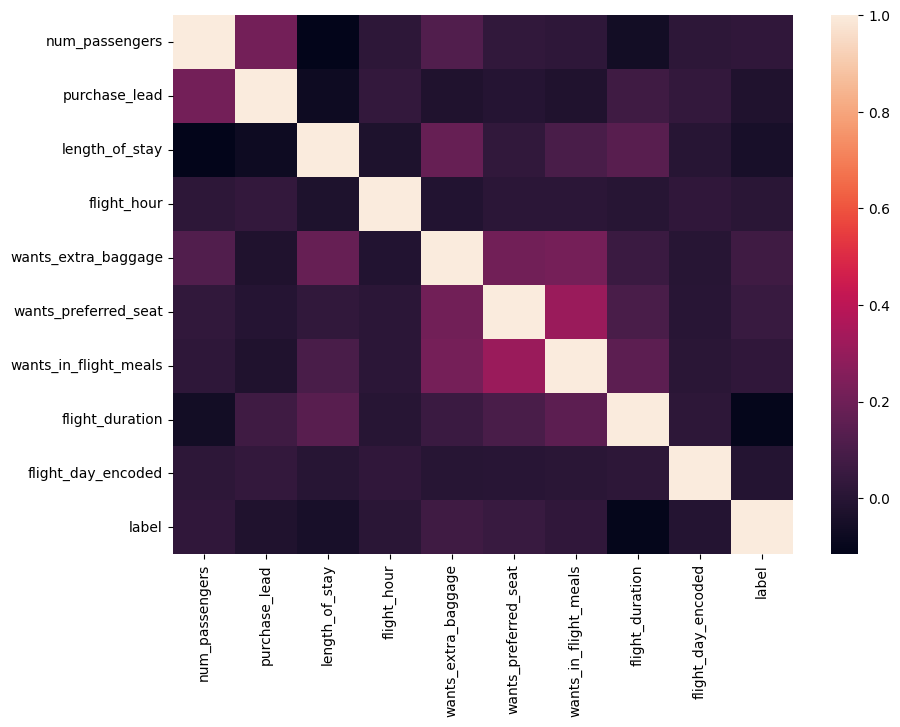

In [ ]:
corr = scaled_df.corr()

plt.figure(figsize=(10,7))

sns.heatmap(corr)

##Splitting test and train data

In [ ]:
from sklearn.model_selection import train_test_split

X = scaled_df.iloc[:,:-1]
y = scaled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

#Random Forest Classifier

In [ ]:
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

##Checking Training accuracy

In [ ]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2)

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2)

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2)

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.94, 1.0 and 0.77 respectively


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = clf_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[8449   71]
 [1423   57]]


In [ ]:
recall = recall_score(y_test, y_pred)

print("Recall (Sensitivity) Score:", recall)

Recall (Sensitivity) Score: 0.038513513513513516


Text(0.5, 0, 'Random Forest Feature Importance')

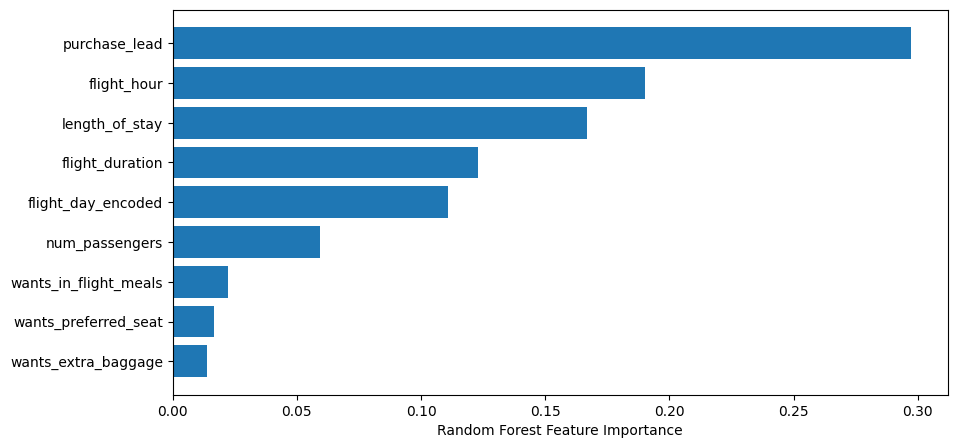

In [ ]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")